In [1]:
'''This Python module will conduct stage 6 of the Henderson Sports' analytical model, Machine learning application,
with the use of the random forest algorithm to predict the players' performance (Adapted from: Holland and Shaw (2019).'''

"This Python module will conduct stage 6 of the Henderson Sports' analytical model, Machine learning application,\nwith the use of the random forest algorithm to predict the players' performance (Adapted from: Holland and Shaw (2019)."

In [2]:
# Use of regression and prediction Machine Learning algorithims

In [3]:
# Importing all necessary libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression

from sklearn import metrics



# Import the processed player datasets for each position
main_dataset = pd.read_csv('file_mid.csv', low_memory=False) 
attack_dataset = pd.read_csv('file_attack.csv', low_memory = False)
def_datatset = pd.read_csv('file_def.csv', low_memory=False)
GK_datatset = pd.read_csv('file_GK.csv', low_memory=False)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

# Title: User Guide - Pandas
# Author: N/A
# Date: No date
# Code Version: 2.2
# Source: "https://pandas.pydata.org/docs/user_guide/index.html"

# Title: NumPy user guide
# Author: N/A
# Date: No date
# Code Version: 2.0
# Source: "https://numpy.org/doc/stable/user/index.html#user"

# Title: Matplotlib 3.9.2 documentation
# Author: N/A
# Date: No date
# Code Version: 3.9.2
# Source: "https://matplotlib.org/stable/index.html"

# Title: sklearn.model_selection
# Author: N/A
# Date: No date
# Code Version: 1.5.1
# Source: "https://scikit-learn.org/stable/api/sklearn.model_selection.html"

# Title: sklearn.ensemble
# Author: N/A
# Date: No date
# Code Version: 1.5.1
# Source: "https://scikit-learn.org/stable//api/sklearn.ensemble.html"

# Title: sklearn.linear_model
# Author: N/A
# Date: No date
# Code Version: 1.5.1
# Source: "https://scikit-learn.org/stable/api/sklearn.linear_model.html"

# Title: sklearn.metrics
# Author: N/A
# Date: No date
# Code Version: 1.5.1
# Source: "https://scikit-learn.org/stable/api/sklearn.metrics.html"

              Age       Goals     Assists  Expected_xG
count  687.000000  687.000000  687.000000   687.000000
mean    24.848617    1.660844    1.655022     1.689374
std      4.399552    2.470814    2.175011     2.045400
min     15.000000    0.000000    0.000000     0.000000
25%     21.000000    0.000000    0.000000     0.300000
50%     25.000000    1.000000    1.000000     1.000000
75%     28.000000    2.000000    2.000000     2.300000
max     37.000000   22.000000   11.000000    18.200000


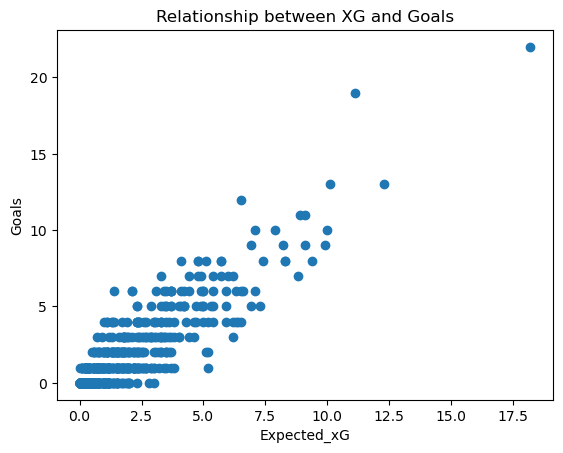

In [4]:
# Conducting some exploratory data analysis 
# For example, finding the averages of these specific metrics
Mid_metrics = ['Age', 'Goals', 'Assists', 'Expected_xG']
print(main_dataset[Mid_metrics].describe())

# Now to visualise the data using matplot 
# FIn this graph we look at the relationship between XG and Goals, to see if there is a correlation
plt.scatter(main_dataset['Expected_xG'], main_dataset['Goals'])
plt.xlabel('Expected_xG')
plt.ylabel('Goals')
plt.title('Relationship between XG and Goals')
plt.show()

In [5]:
# Dropping all rows that contain 'na' allowing for Random Forest algorithim to work  
main_dataset.dropna(inplace=True)
main_dataset

# Identifying the categorical columns and putting them in a variable
categorical_columns = main_dataset.select_dtypes(include=['object']).columns
categorical_columns

# Identifying the numerical columns and putting them in a variable
numerical_columns = main_dataset.select_dtypes(include=['float', 'int']).columns
numerical_columns

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

# Adapted From:
# Title: How to Use the ColumnTransformer for Data Preparation 
# Author: Jason Brownlee 
# Date: 2020
# Code Version: N/A
# Source: https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

Index(['Fouls_Commited', 'Fouls_Won', 'Offsides', 'Crosses', 'Penalties_Won',
       'Penalties_Conceded', 'Own_Goals', 'Ball_Recoveries',
       'Aerial_Duels_Won', 'Aerial_Duels_Lost', 'Aerial_Duels_Won_Per', 'Age',
       'Playing_Time_MP', 'Playing_Time_Starts', 'Playing_Time_Min',
       'Playing_Time_90s', 'Goals', 'Assists', 'Goals_and_Assists',
       'Goals_Minus_PK', 'Penalty_Goals', 'Penalties_Attempted',
       'Performance_CrdY', 'Performance_CrdR', 'Expected_xG', 'Expected_npxG',
       'Expected_xAG', 'Progression_PrgC', 'Progression_PrgP',
       'Progression_PrgR', 'Per_90_Min_Gls', 'Per 90 Minutes Ast',
       'Per_90_Min_Goal_Contributions', 'Per_90_Min_Non_Pen_Goals',
       'Per_90_Min_Non_Penalty_Goal_Contributions', 'Per_90_Min_xG',
       'Per_90_Min_xAG', 'Per_90_Min_xG+xAG', 'Per_90_Min_npxG',
       'Per_90_Min_npxG+xAG', 'Touches_Def_Pen', 'Touches_Def_3rd',
       'Touches_Mid_3rd', 'Touches_Att_3rd', 'Touches_Att_Pen', 'Touches_Live',
       'Take_Ons_Att'

In [6]:
# Defining the features, the numerical columns' variable and the target variable of score
# In this case, 'Score (Player Score)' will be droppped to be used as the target variable
X_mid = main_dataset[numerical_columns].drop(['Score'], axis=1)
y_mid = main_dataset['Score']

# Splitting the data into training (80%) and test (20%) sets
X_train_mid, X_test_mid, y_train_mid, y_test_mid = train_test_split(X_mid, y_mid, test_size=0.2, random_state=42)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# Source: https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

# Adapted From:
# Title: How to Use the ColumnTransformer for Data Preparation 
# Author: Jason Brownlee 
# Date: 2020
# Code Version: N/A
# Source: https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

In [7]:
# Here we create a Random Forest Regressor model
rf_mod_mid = RandomForestRegressor(n_estimators=100, max_depth=30,  min_samples_split=2, min_samples_leaf=1, random_state=42)

# The model has to be trained so it can make predictions 
# This will be done using the midfielder dataset
rf_mod_mid.fit(X_train_mid, y_train_mid)

# This displays how important each feature is
importances_mid = rf_mod_mid.feature_importances_

# Now arrange the features by their importance, so they can be ranked
features_importance_mid = sorted(zip(importances_mid, X_train_mid.columns), reverse=True)

# Print the rankings of the wich features are the most important
for rank, (importance_mid, feature_mid) in enumerate(features_importance_mid, start=1):
    print(f"{rank}. {feature_mid}: {importance_mid}")
    
# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

1. Touches_Live: 0.3422671533424497
2. Touches: 0.27917112140411765
3. Progression_PrgP: 0.12985377243005958
4. Usage_Rate_Per: 0.0763245674175466
5. Playing_Time_Min: 0.04214427692333845
6. Aerial_Duels_Won_Per: 0.014239872223530979
7. Tackles_TklW: 0.012631081544991374
8. Playing_Time_90s: 0.011909948190554022
9. Carries_PrgDist: 0.0080818416365211
10. Ball_Recoveries: 0.0068032360024327145
11. Take_Ons_Succ_Per: 0.006135103608619189
12. Dribblers_Tkl: 0.004630864742927835
13. Aerial_Duels_Won: 0.004239125111294289
14. Passes_Recieved: 0.003322874044173171
15. Touches_Att_3rd: 0.0028696323841873065
16. Take_Ons_Succ: 0.0025016326249708916
17. Tkl_Plus_Int: 0.0024016872912625085
18. Dispossessed: 0.0021768974704069032
19. Carries_TotDist: 0.001932654950627625
20. Expected_xAG: 0.0018726086411496514
21. Miscontrol: 0.0017501059982204417
22. Per_Dribblers_Tkl_Succ: 0.0016913367570944079
23. Tackles_Tkl: 0.0016509018913307624
24. Touches_Mid_3rd: 0.00159577735576528
25. Take_Ons_Tkld_Per

In [8]:
# Now to predict each player's future performance, with 'score' acting as the target variable
# Creating the 'Predicted_Performance' variable and putting it into the dataset
main_dataset['Predicted_Performance'] = rf_mod_mid.predict(X_mid)

# This will print the players (midfielders) and their predicted performance
output_dataset_mid = main_dataset[['Player', 'Predicted_Performance']]
print(output_dataset_mid)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

               Player  Predicted_Performance
0               Rodri               6715.430
1     Bruno Fernandes               6974.685
3     Bruno Guimarães               6938.210
4     Martin Ødegaard               6847.080
7        Granit Xhaka               6652.905
..                ...                    ...
635     Lilian Egloff                678.420
636  Arthur Vermeeren                550.620
638         Jack Cork                458.200
639         José Mari                507.440
646       Luke Harris                246.130

[445 rows x 2 columns]


In [9]:
# Evaluating the Algorithm
# Midfielders

# Predicting the Test set results
val_test_pred_Mid = rf_mod_mid.predict(X_test_mid)

# Calculate evaluation metrics for midfielders
print('Evaluation metrics (Midfielders):')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_mid, val_test_pred_Mid))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_mid, val_test_pred_Mid))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_mid, val_test_pred_Mid)))

# Defining the values needed to calculate the normalised RSME
rmse_mid = np.sqrt(metrics.mean_squared_error(y_test_mid, val_test_pred_Mid))
max_val_mid = main_dataset['Score'].max()
min_val_mid =  main_dataset['Score'].min()

# Calculation for the normalised RMSE (midfielders)
normalised_rmse_value = rmse_mid / (max_val_mid - min_val_mid)

print("Normalised RMSE:", normalised_rmse_value)

# Adapted From:
# Title: Random Forest Regression Using Python Sklearn From Scratch 
# Author: Bharathiraja
# Date: 2018
# Code Version: N/A
# Source: https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb

Evaluation metrics (Midfielders):
Mean Absolute Error: 220.74134831460677
Mean Squared Error: 104906.21955842696
Root Mean Squared Error: 323.8922962319835
Normalised RMSE: 0.03894574595466645


In [10]:
# Attacking Players

In [11]:
# Repeating the process of finding averages for important stats and finding a relationship between goals and XG
interested_att_met = ['Goals', 'Assists', 'Age', 'Expected_xG']
print(attack_dataset[interested_att_met].describe()) 

            Goals     Assists         Age  Expected_xG
count  773.000000  773.000000  773.000000   773.000000
mean     3.839586    2.021992   24.683053     3.782147
std      4.890261    2.608432    4.477831     4.353251
min      0.000000    0.000000    0.000000     0.000000
25%      0.000000    0.000000   22.000000     0.500000
50%      2.000000    1.000000   24.000000     2.400000
75%      6.000000    3.000000   28.000000     5.300000
max     36.000000   13.000000   37.000000    30.600000


In [12]:
# Dropping unnecessary columns and rows with 'na' to allow the Random Forest algorithim to peform well
attack_dataset_1 = attack_dataset.drop(columns=['Agent_Name', 'Contract_Expiration_Date', 'Country_of_Citizenship',
                                                'Sub_Position', 'Country_of_Birth', 'Current_Club_Name', 'Nation',
                                               'Position'])
attack_dataset_1.dropna(inplace=True)

# Creating varibles for the numerical and categorical columns
cat_att_col = attack_dataset_1.select_dtypes(include = ['object']).columns
num_att_col = attack_dataset_1.select_dtypes(include = ['float', 'int']).columns

# Defining the features (numerical columns) and target variable (Score)
X_att = attack_dataset_1[num_att_col].drop(['Score'], axis=1)
Y_att = attack_dataset_1['Score']

# Splitting the data into training (80%) and test (20%) sets 
X_att_train, X_att_test, Y_att_train, Y_att_test = train_test_split(X_att, Y_att, test_size=0.2, random_state=42)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

# Adapted From:
# Title: How to Use the ColumnTransformer for Data Preparation 
# Author: Jason Brownlee 
# Date: 2020
# Code Version: N/A
# Source: https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

In [13]:
# Creating a Random Forest Regressor model for attacking players
randomforest_attack_model = RandomForestRegressor(n_estimators=100, max_depth=30,  min_samples_split=2, min_samples_leaf=1, random_state=42)

# Training the model using the data from the attacking players dataset
randomforest_attack_model.fit(X_att_train, Y_att_train)

# For the model, assigning and ranking the importance of each feature
important_attack = randomforest_attack_model.feature_importances_
feat_importance_att = sorted(zip(important_attack, X_att_train.columns), reverse=True)
for rank, (important_attack, feature_att) in enumerate (feat_importance_att, start=1):
    print(f"{rank}. {feature_att}: {important_attack}")
    
# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

1. Goals_and_Assists: 0.5550658858868232
2. Touches_Att_3rd: 0.09301478296478395
3. Passes_Recieved: 0.08308930436992618
4. Playing_Time_Min: 0.07163522015611475
5. Playing_Time_90s: 0.04619300226361787
6. Take_Ons_Succ_Per: 0.021886234573929752
7. Aerial_Duels_Won_Per: 0.019083464880798987
8. Take_Ons_Succ: 0.009956554424093513
9. Carries_TotDist: 0.008812929093809634
10. Touches_Mid_3rd: 0.008134817191439209
11. Carries_PrgDist: 0.005463793140556225
12. Goals_Minus_PK: 0.005431240204831458
13. Ball_Recoveries: 0.004586296266747028
14. Carries: 0.0045511147624849166
15. Touches: 0.004280651031386986
16. Touches_Live: 0.0033552267816864658
17. Carries_Into_Final_1/3: 0.002422953557379901
18. Usage_Rate_Per: 0.0023543140530824062
19. Take_Ons_Tkld_Per: 0.002317344032298701
20. Touches_Att_Pen: 0.0022943862685953333
21. Fouls_Commited: 0.0022447386289967657
22. Aerial_Duels_Won: 0.002187153915935373
23. Market_Value_in_Eur: 0.001997845168455616
24. Highest_Market_Value_in_Eur: 0.00196188

In [14]:
# Creating a Predicted Performance variables based on the target variable 'Score'
# Predict performance for each player in the attacking player dataset
attack_dataset_1['Predicted_Performance'] = randomforest_attack_model.predict(X_att)
output_dataset_att = attack_dataset_1[['Player', 'Predicted_Performance']]
print(output_dataset_att)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

                Player  Predicted_Performance
0           Harry Kane               4796.617
1      Jude Bellingham               4391.952
2          Cole Palmer               4075.077
3           Phil Foden               4297.740
4          Bukayo Saka               4225.461
..                 ...                    ...
746      Dane Scarlett                 73.931
748          José Pozo                 30.821
749    David Mamutovic                  7.042
751    Jeppe Corfitzen                  9.996
755  Deivid Washington                 14.924

[690 rows x 2 columns]


In [15]:
# Updating the attacking dataset with the Predicted Performance variable
new_att_dataset_1 = pd.merge(attack_dataset, output_dataset_att, on='Player')
new_att_dataset_1

# Adapted From:
# Title: Join in Pandas: Merge data frames (inner, outer, right, left join) in pandas python
# Author: Sridhar Venkatachalam
# Date: No date
# Code Version: N/A
# Source: "https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/""

# Adapted From:
# Title: Python | Pandas dataframe.drop_duplicates()
# Author: Geeks for Geeks
# Date: 2024
# Code Version: N/A
# Source: "https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/"

,Squad,Player,Fouls_Commited,Fouls_Won,Offsides,Crosses,Penalties_Won,Penalties_Conceded,Own_Goals,Ball_Recoveries,...,Height_in_CM,Contract_Expiration_Date,Agent_Name,Current_Club_Name,Market_Value_in_Eur,Highest_Market_Value_in_Eur,Touches,Usage_Rate_Per,Score,Predicted_Performance
0,Bayern Munich,Harry Kane,10.0,39.0,13.0,31.0,0.0,0.0,0.0,55.0,...,188.0,2027-06-30 00:00:00,CK66,FC Bayern München,110000000.0,150000000.0,995.0,3.734424,5367.2,4796.617
1,Real Madrid,Jude Bellingham,32.0,72.0,4.0,21.0,0.0,0.0,0.0,118.0,...,186.0,2029-06-30 00:00:00,NaN,Real Madrid Club de Fútbol,180000000.0,180000000.0,1897.0,6.616672,4581.7,4391.952
2,Chelsea,Cole Palmer,23.0,26.0,6.0,81.0,1.0,0.0,0.0,105.0,...,189.0,2030-06-30 00:00:00,CAA Base Ltd,Chelsea Football Club,55000000.0,55000000.0,1754.0,6.326420,4534.4,4075.077
3,Manchester City,Phil Foden,14.0,60.0,5.0,89.0,0.0,1.0,0.0,127.0,...,171.0,2027-06-30 00:00:00,NaN,Manchester City Football Club,130000000.0,130000000.0,2146.0,6.831349,4398.1,4297.740
4,Arsenal,Bukayo Saka,41.0,69.0,8.0,181.0,1.0,0.0,0.0,155.0,...,178.0,2027-06-30 00:00:00,NaN,Arsenal Football Club,130000000.0,130000000.0,1952.0,7.367984,4338.5,4225.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,Tottenham,Dane Scarlett,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,180.0,2023-05-31 00:00:00,CAA Base Ltd,Tottenham Hotspur Football Club,1800000.0,2000000.0,11.0,0.038557,7.0,73.931
686,Rayo Vallecano,José Pozo,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,171.0,2024-06-30 00:00:00,YOU FIRST,Rayo Vallecano de Madrid S.A.D.,1000000.0,3000000.0,16.0,0.073540,7.0,30.821
687,Mainz 05,David Mamutovic,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,...,189.0,2025-06-30 00:00:00,KL Sportsbase,1. Fußball- und Sportverein Mainz 05,300000.0,300000.0,12.0,0.062461,7.0,7.042
688,Lecce,Jeppe Corfitzen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,179.0,2025-06-30 00:00:00,NINE Group,Unione Sportiva Lecce,400000.0,400000.0,6.0,0.030584,6.0,9.996


In [16]:
# Evaluating the Algorithm
# Attacking Player

# Predicting the Test set results
val_test_pred_Att = randomforest_attack_model.predict(X_att_test)

# Calculate evaluation metrics for attacking players
print('Evaluation metrics (Attacking Players):')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_att_test, val_test_pred_Att))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_att_test, val_test_pred_Att))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_att_test, val_test_pred_Att)))

# Define the values for the normalised RSME
rmse_att = np.sqrt(metrics.mean_squared_error(Y_att_test, val_test_pred_Att))
max_val_att = new_att_dataset_1['Score'].max()
min_val_att =  new_att_dataset_1['Score'].min()

# Calculation for the normalised RMSE
normalised_rmse_value_att = rmse_att / (max_val_att - min_val_att)

print("Normalised RMSE:", normalised_rmse_value_att)

# Adapted From:
# Title: Random Forest Regression Using Python Sklearn From Scratch 
# Author: Bharathiraja
# Date: 2018
# Code Version: N/A
# Source: https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb

Evaluation metrics (Attacking Players):
Mean Absolute Error: 155.96724637681163
Mean Squared Error: 42145.84865531891
Root Mean Squared Error: 205.2945412214336
Normalised RMSE: 0.03827479934027511


In [17]:
# Defenders

In [18]:
# Dropping unnecessary columns for cleaner data for algorithim
# Dropping 'Na' to make the Random Forest algorithim more effective
def_datatset_1 = def_datatset.drop(columns=['Agent_Name', 'Contract_Expiration_Date', 'Country_of_Citizenship','Sub_Position'])
def_datatset_1.dropna(inplace=True)
def_datatset_1

# Creating variables for the numerical and categorical columns for the defensive players
cat_def_col = def_datatset_1.select_dtypes(include=['object']).columns
num_def_col = def_datatset_1.select_dtypes(include=['int', 'float']).columns

# Defining features (Defensive players numerical data) and target (Score)
X_Def = def_datatset_1[num_def_col].drop(['Score'], axis=1)
Y_Def = def_datatset_1['Score']

# Splitting the data into training (80%) and test (20%) sets 
X_Def_train, X_Def_test, Y_Def_train, Y_Def_test = train_test_split(X_Def, Y_Def, test_size=0.2, random_state=42)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

# Adapted From:
# Title: How to Use the ColumnTransformer for Data Preparation 
# Author: Jason Brownlee 
# Date: 2020
# Code Version: N/A
# Source: https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

In [19]:
# Creating a Random Forest Regressor model for defensive players
RandomForest_Model_Def = RandomForestRegressor(n_estimators=100, max_depth=30,  min_samples_split=2, min_samples_leaf=1, random_state=42)
RandomForest_Model_Def.fit(X_Def_train, Y_Def_train)

# Assingning importance to each feature for the defensive players and ranking it
imp_def = RandomForest_Model_Def.feature_importances_
feat_imp_def =  sorted(zip(imp_def, X_Def_train.columns), reverse = True)
for rank_def, (imp_def, feature) in enumerate (feat_imp_def, start=1):
    print(f"{rank_def}. {feature}: {imp_def}")
    
# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

1. Usage_Rate_Per: 0.26200961208181384
2. Tkl_Plus_Int: 0.20034131839714336
3. Per_Dribblers_Tkl_Succ: 0.16176333970575502
4. Playing_Time_Min: 0.14488937660055187
5. Playing_Time_90s: 0.06296851156153438
6. Dribblers_Tkl: 0.023356273636623105
7. Tackles_Tkl: 0.014036401819593074
8. Aerial_Duels_Won_Per: 0.013644155058955543
9. Ball_Recoveries: 0.012223707223475705
10. Tackles_Def_3rd: 0.010943230098030127
11. Tackles_TklW: 0.01071372704074382
12. Touches: 0.010000064165070866
13. Aerial_Duels_Won: 0.007365357111585651
14. Playing_Time_Starts: 0.006777917609157805
15. Clearances: 0.005521263359023162
16. Touches_Live: 0.004645601746625385
17. Playing_Time_MP: 0.0031858543752880915
18. Touches_Def_3rd: 0.0029414708145277884
19. Blocks: 0.0025502199224627974
20. Dribblers_Challenged: 0.002291602848897748
21. Touches_Def_Pen: 0.002177227426972265
22. Touches_Mid_3rd: 0.0018134523556813944
23. Challenges_Lost: 0.0017796012887782682
24. Touches_Att_Pen: 0.0016121918363336692
25. Interceptio

In [20]:
# Predicts performance for each player in the defender dataset
def_datatset_1['Predicted_Performance'] = rf_mod_mid.predict(X_Def)
output_dataset_def = def_datatset_1[['Player', 'Predicted_Performance']]
print(output_dataset_def)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

               Player  Predicted_Performance
0         Pedro Porro               5358.215
1    Antonee Robinson               4874.600
2         Timo Hübers               4572.150
3       Sergi Cardona               4978.055
4            Bernardo               4701.575
..                ...                    ...
729  Mahamadou Nagida               1392.870
730   Aitor Fernández                618.225
731        Borna Sosa                608.555
732    Jérémy Jacquet                464.860
733       Enzo Ebosse                489.925

[723 rows x 2 columns]


In [21]:
# Arranges defenders by their 'Score'
new_def_datatset_1 = pd.merge(def_datatset, output_dataset_def, on='Player')
new_def_datatset_1

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

# Adapted From:
# Title: Join in Pandas: Merge data frames (inner, outer, right, left join) in pandas python
# Author: Sridhar Venkatachalam
# Date: No date
# Code Version: N/A
# Source: "https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/""

# Adapted From:
# Title: Python | Pandas dataframe.drop_duplicates()
# Author: Geeks for Geeks
# Date: 2024
# Code Version: N/A
# Source: "https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/"

,Squad,Player,Fouls_Commited,Fouls_Won,Offsides,Crosses,Penalties_Won,Penalties_Conceded,Own_Goals,Ball_Recoveries,...,Height_in_CM,Contract_Expiration_Date,Agent_Name,Current_Club_Name,Market_Value_in_Eur,Highest_Market_Value_in_Eur,Touches,Usage_Rate_Per,Score,Predicted_Performance
0,Tottenham,Pedro Porro,37.0,27.0,1.0,198.0,0.0,1.0,0.0,199.0,...,173.0,2028-06-30 00:00:00,CAA Base Ltd,Tottenham Hotspur Football Club,45000000.0,45000000.0,2786.0,9.765502,6259.1,5358.215
1,Fulham,Antonee Robinson,34.0,20.0,3.0,132.0,0.0,0.0,2.0,227.0,...,183.0,2028-06-30 00:00:00,Wasserman,Fulham Football Club,20000000.0,20000000.0,2536.0,10.428489,6159.2,4874.600
2,Köln,Timo Hübers,44.0,25.0,1.0,3.0,1.0,0.0,0.0,211.0,...,190.0,2026-06-30 00:00:00,11WINS,1. Fußball-Club Köln,7500000.0,8500000.0,2143.0,11.071502,5782.2,4572.150
3,Las Palmas,Sergi Cardona,52.0,60.0,5.0,89.0,0.0,0.0,0.0,188.0,...,186.0,2024-06-30 00:00:00,EMG Mundial,Unión Deportiva Las Palmas S.A.D.,6000000.0,6000000.0,2586.0,9.563256,5764.4,4978.055
4,Bochum,Bernardo,54.0,28.0,2.0,30.0,0.0,2.0,0.0,197.0,...,186.0,2025-06-30 00:00:00,Kick&Run,Verein für Leibesübungen Bochum 1848 – Fußball...,5500000.0,9000000.0,2103.0,11.453625,5722.2,4701.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,Rennes,Mahamadou Nagida,0.0,2.0,0.0,12.0,0.0,0.0,0.0,8.0,...,176.0,2028-06-30 00:00:00,Soccermax,Stade Rennais Football Club,500000.0,500000.0,82.0,0.384977,458.0,1392.870
719,Osasuna,Aitor Fernández,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,...,180.0,NaN,NaN,Zirka Kropyvnytskyi,50000.0,500000.0,216.0,1.019782,46.0,618.225
720,Stuttgart,Borna Sosa,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,...,187.0,2028-06-30 00:00:00,SEG,AFC Ajax Amsterdam,8000000.0,23000000.0,48.0,0.183178,45.0,608.555
721,Rennes,Jérémy Jacquet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,188.0,2024-06-30 00:00:00,One Team Football,Clermont Foot 63,300000.0,300000.0,7.0,0.032864,28.0,464.860


In [22]:
# Evaluating the Algorithm

# Predicting the Test set results
val_test_pred_Def = RandomForest_Model_Def.predict(X_Def_test)

# Calculate evaluation metrics for defenders
print('Evaluation Metrics (Defenders):')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_Def_test, val_test_pred_Def))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_Def_test, val_test_pred_Def))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Def_test, val_test_pred_Def)))

# Define the values for the normalised RSME (defenders)
rmse_def = np.sqrt(metrics.mean_squared_error(Y_Def_test, val_test_pred_Def))
max_val_def = new_def_datatset_1['Score'].max()
min_val_def =  new_def_datatset_1['Score'].min()

# Calculation for the normalised RMSE
normalised_rmse_value_def = rmse_def / (max_val_def - min_val_def)

print("Normalised RMSE:", normalised_rmse_value_def)

# Adapted From:
# Title: Random Forest Regression Using Python Sklearn From Scratch 
# Author: Bharathiraja
# Date: 2018
# Code Version: N/A
# Source: https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb

Evaluation Metrics (Defenders):
Mean Absolute Error: 149.99295172413787
Mean Squared Error: 40689.02517089652
Root Mean Squared Error: 201.7152080803441
Normalised RMSE: 0.03237232721033912


In [23]:
# Goalkeepers

       Performance_Save_Per  PSxG_minus_GA_90
count            179.000000        179.000000
mean              68.348045         -0.163464
std               17.206738          1.949848
min                0.000000        -19.200000
25%               64.450000         -0.245000
50%               70.600000         -0.030000
75%               75.450000          0.115000
max              100.000000         13.520000


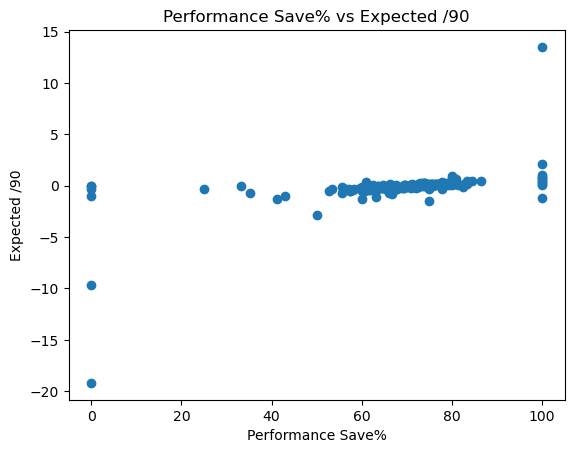

In [24]:
# Find the important Goalkeeper averages 
# Graphs plots a relationship between a Goalkeeper's save percentage and Post-Shot Expected Goals - minus goals allowed
GK_met = ['Performance_Save_Per', 'PSxG_minus_GA_90']
print(GK_datatset[GK_met].describe())
plt.scatter(GK_datatset['Performance_Save_Per'], GK_datatset['PSxG_minus_GA_90'])
plt.title('Performance Save% vs Expected /90')
plt.xlabel('Performance Save%')
plt.ylabel('Expected /90')
plt.show()

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

In [25]:
# Dropping rows with 'na' values so that the algorithim is effective
GK_datatset.dropna(inplace=True)

# Creating variables for the numerical and categorical columns for the Goalkeepers
cat_col_GK = GK_datatset.select_dtypes(include=['object']).columns
Num_col_GK = GK_datatset.select_dtypes(include=['int', 'float']).columns

# Defining features (Goalkeepers' numerical data) and target (Score)
X_GK = GK_datatset[Num_col_GK].drop(['Score'], axis=1)
Y_GK = GK_datatset['Score']

# Splitting the data into training (80%) and test (20%) sets
X_train_GK, X_test_GK, y_train_GK, y_test_GK = train_test_split(X_GK, Y_GK, test_size=0.2, random_state=42)

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

# Adapted From:
# Title: How to Use the ColumnTransformer for Data Preparation 
# Author: Jason Brownlee 
# Date: 2020
# Code Version: N/A
# Source: https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

In [26]:
# Building a Random Forest Regressor model and training it with the Goalkeeper data
RandomForest_Model_GK = RandomForestRegressor(n_estimators=100, max_depth=30,  min_samples_split=2, min_samples_leaf=1, random_state=42)
RandomForest_Model_GK.fit(X_train_GK, y_train_GK)

# Assigning importance for each feature and then ranking the features
imp_GK = RandomForest_Model_GK.feature_importances_
feat_imp_def =  sorted(zip(imp_GK, X_train_GK.columns), reverse = True)
for rank_GK, (imp_GK, feature) in enumerate (feat_imp_def, start=1):
    print(f"{rank_GK}. {feature}: {imp_GK}")
    
# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

1. Number_of_Sweep: 0.34022443121906387
2. Penalty_Kick_Save_Per: 0.17559121517978862
3. Passes_Attempted: 0.17081145697644193
4. Long_Pass_Acc_per: 0.09726951964532328
5. Penalties_saved: 0.04111989300719873
6. PSxG_minus_GA: 0.03154113828210581
7. Number_of_Sweep_per_90: 0.020029200001841167
8. Touches: 0.019917562206199467
9. Sweeper_Avg_Dist: 0.015443659872627611
10. Per_Goal_Kicks_Launch: 0.012865660297206462
11. PSxG_minus_GA_90: 0.011006547278795993
12. Performance_Save_Per: 0.010489966387244592
13. Rk: 0.009156819608580455
14. Usage_Rate_Per: 0.005742735574481902
15. Per_Passes_Launched: 0.0056305063382546434
16. Crosses_Stp: 0.004621546872312889
17. Avg_Pass_Length: 0.004176407622349701
18. Throws_Attemp: 0.003747313105300677
19. Market_Value_in_Eur: 0.0031038106610835887
20. Avg_Length_Goal_Kick: 0.003037874398211936
21. Height_in_CM: 0.0028771335712759155
22. Crosses_Stp_Per: 0.0025090679606711496
23. Age: 0.002273181871766374
24. Highest_Market_Value_in_Eur: 0.0022184760310

In [27]:
# Predict the performance for each Goalkeeper 
GK_datatset['Predicted_Performance'] = RandomForest_Model_GK.predict(X_GK)
GoalKeep_datatset = GK_datatset[['Player', 'Predicted_Performance']]
GoalKeep_datatset

# Adapted From:
# Title: Drafting the Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios 
# Author: MaFisher
# Date: 2023
# Code Version: N/A
# https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f

,Player,Predicted_Performance
0,Sergio Herrera,754.131
1,Oliver Baumann,860.262
2,Unai Simón,857.768
3,Manuel Riemann,737.970
4,Federico Ravaglia,457.171
...,...,...
173,Simone Aresti,102.503
174,Remi Matthews,77.367
176,Jean-Louis Leca,67.396
177,Tommaso Martinelli,95.097


In [28]:
GK_datatset_1 = GK_datatset

In [29]:
GK_datatset_1.columns

Index(['Squad', 'Player', 'Country_of_Birth', 'Country_of_Citizenship', 'DOB',
       'Position', 'Foot', 'Height_in_CM', 'Contract_Expiration_Date',
       'Agent_Name', 'Current_Club_Name', 'Market_Value_in_Eur',
       'Highest_Market_Value_in_Eur', 'Nation', 'Age', 'PSxG_minus_GA',
       'PSxG_minus_GA_90', 'Long_Pass_Acc_per', 'Passes_Attempted',
       'Throws_Attemp', 'Per_Passes_Launched', 'Avg_Pass_Length',
       'Goal_Kicks_Att', 'Per_Goal_Kicks_Launch', 'Avg_Length_Goal_Kick',
       'Crosses_Faced', 'Crosses_Stp', 'Crosses_Stp_Per', 'Number_of_Sweep',
       'Number_of_Sweep_per_90', 'Sweeper_Avg_Dist', 'Comp',
       'Performance_Save_Per', 'Penalties_saved', 'Penalty Kicks PKm',
       'Penalty_Kick_Save_Per', 'Rk', 'Touches', 'Usage_Rate_Per', 'Score',
       'Predicted_Performance'],
      dtype='object')

In [30]:
# Evaluating the Algorithm

# Predicting the Test set results
val_test_pred_GK = RandomForest_Model_GK.predict(X_test_GK)

# Calculate evaluation metrics for Goalkeepers
print('Evaluation Metrics (Goalkeepers):')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_GK, val_test_pred_GK))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_GK, val_test_pred_GK))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_GK, val_test_pred_GK)))

# Define the values for the normalised RSME
rmse_GK = np.sqrt(metrics.mean_squared_error(y_test_GK, val_test_pred_GK))
max_val_GK = GK_datatset_1['Score'].max()
min_val_GK =  GK_datatset_1['Score'].min()

# Calculation for the normalised RMSE
normalised_rmse_value_GK = rmse_GK / (max_val_GK - min_val_GK)

print("Normalised RMSE:", normalised_rmse_value_GK)

# Adapted From:
# Title: Random Forest Regression Using Python Sklearn From Scratch 
# Author: Bharathiraja
# Date: 2018
# Code Version: N/A
# Source: https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb

Evaluation Metrics (Goalkeepers):
Mean Absolute Error: 54.804615384615346
Mean Squared Error: 7775.682502230761
Root Mean Squared Error: 88.17983047290781
Normalised RMSE: 0.0889716784107636


In [31]:
# Graphs

In [32]:
# Create linear regression model
model_Lin_Pred = LinearRegression()

R-squared: 0.9860925260914667


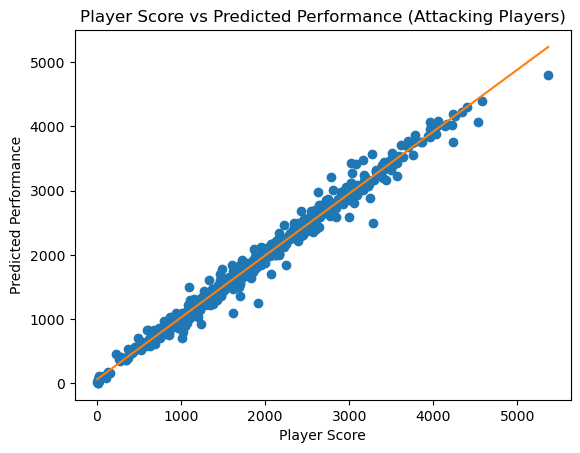

In [33]:
# Graph for examining the relationship between attacking players' Player Score and Predicted Performance

# Create the scatterplot graph
x_Att_line = new_att_dataset_1['Score']
y_Att_line = new_att_dataset_1['Predicted_Performance']

plt.plot(x_Att_line, y_Att_line, 'o')
plt.title('Player Score vs Predicted Performance (Attacking Players)')
plt.xlabel('Player Score')
plt.ylabel('Predicted Performance')

# Obtain m(slope) and b(intercept) to create the linear regression line
m, b = np.polyfit(x_Att_line, y_Att_line, 1)

# This adds the linear regression line to the scatterplot graph
plt.plot(x_Att_line, m * x_Att_line + b)


# Creating dataframe
pred_val_Att_2 = pd.DataFrame(new_att_dataset_1)

# Define X and response y variables using the Predicted Performance and Player Score for attacking players
X_Att = pred_val_Att_2[['Score']]  
y_Att = pred_val_Att_2['Predicted_Performance']

# Evaluating the model
model_Lin_Pred.fit(X_Att, y_Att)
rsq_Att = model_Lin_Pred.score(X_Att, y_Att)
print(f'R-squared: {rsq_Att}')

# Adapted From:
# Title: How to Create a Scatterplot with a Regression Line in Python
# Author: Bobbitt, Zach
# Date: 2020
# Code Version: N/A
# Source: "https://www.statology.org/scatterplot-with-regression-line-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (With Example)
# Author: Bobbitt, Zach
# Date: 2022
# Code Version: N/A
# Source: "https://www.statology.org/r-squared-in-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (SkLearn and SciPy)
# Author: Piepenbreier, Nik
# Date: 2023
# Code Version: N/A
# Source: "https://datagy.io/python-r-squared/"

R-squared: 0.985857347655082


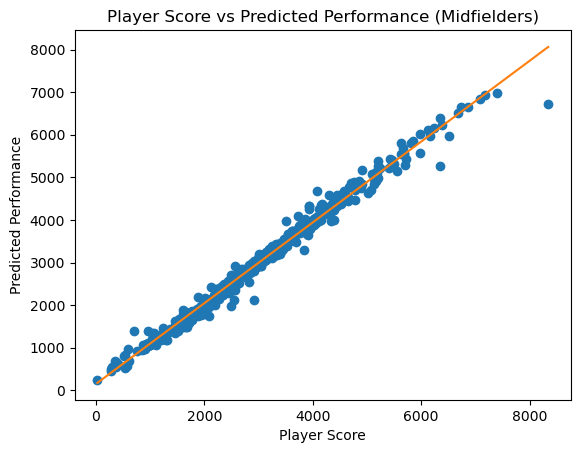

In [34]:
# Graph for examining the relationship between midfielders' Player Score and Predicted Performance

# Create the scatterplot graph
x_mid_line = main_dataset['Score']
y_mid_line = main_dataset['Predicted_Performance']

plt.plot(x_mid_line, y_mid_line, 'o')
plt.title('Player Score vs Predicted Performance (Midfielders)')
plt.xlabel('Player Score')
plt.ylabel('Predicted Performance')

# Obtain m(slope) and b(intercept) to create the linear regression line
m, b = np.polyfit(x_mid_line, y_mid_line, 1)

# This adds the linear regression line to the scatterplot graph
plt.plot(x_mid_line, m * x_mid_line + b)


# Creating dataframe
pred_val_mid_2 = pd.DataFrame(main_dataset)

# Define X and response y variables using the Predicted Performance and Player Score for midfielders
X_mid = pred_val_mid_2[['Score']]  
y_mid = pred_val_mid_2['Predicted_Performance']

# Evaluating the model
model_Lin_Pred.fit(X_mid, y_mid)
rsq_mid = model_Lin_Pred.score(X_mid, y_mid)
print(f'R-squared: {rsq_mid}')

# Adapted From:
# Title: How to Create a Scatterplot with a Regression Line in Python
# Author: Bobbitt, Zach
# Date: 2020
# Code Version: N/A
# Source: "https://www.statology.org/scatterplot-with-regression-line-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (With Example)
# Author: Bobbitt, Zach
# Date: 2022
# Code Version: N/A
# Source: "https://www.statology.org/r-squared-in-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (SkLearn and SciPy)
# Author: Piepenbreier, Nik
# Date: 2023
# Code Version: N/A
# Source: "https://datagy.io/python-r-squared/

In [35]:
new_def_datatset_1.columns

Index(['Squad', 'Player', 'Fouls_Commited', 'Fouls_Won', 'Offsides', 'Crosses',
       'Penalties_Won', 'Penalties_Conceded', 'Own_Goals', 'Ball_Recoveries',
       'Aerial_Duels_Won', 'Aerial_Duels_Lost', 'Aerial_Duels_Won_Per',
       'Nation', 'Comp', 'Age', 'Playing_Time_MP', 'Playing_Time_Starts',
       'Playing_Time_Min', 'Playing_Time_90s', 'Goals', 'Assists',
       'Goals_and_Assists', 'Goals_Minus_PK', 'Penalty_Goals',
       'Penalties_Attempted', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Progression_PrgC',
       'Progression_PrgP', 'Progression_PrgR', 'Per_90_Min_Gls',
       'Per 90 Minutes Ast', 'Per_90_Min_Goal_Contributions',
       'Per_90_Min_Non_Pen_Goals', 'Per_90_Min_Non_Penalty_Goal_Contributions',
       'Per_90_Min_xG', 'Per_90_Min_xAG', 'Per_90_Min_xG+xAG',
       'Per_90_Min_npxG', 'Per_90_Min_npxG+xAG', 'Touches_Def_Pen',
       'Touches_Def_3rd', 'Touches_Mid_3rd', 'Touches_Att_3rd',
       'Touches_Att

R-squared: 0.7398514753336685


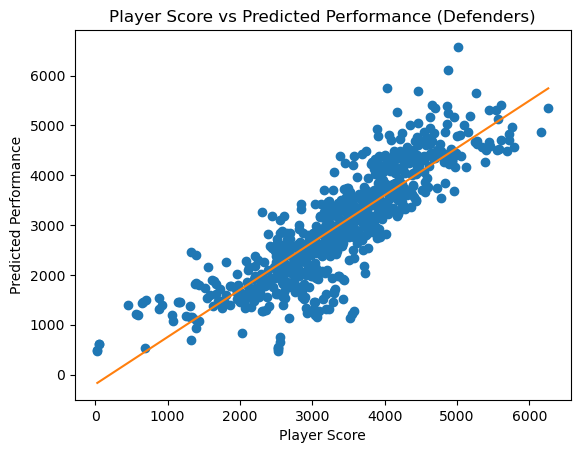

In [36]:
# Graph for examining the relationship between defenders' Player Score and Predicted Performance

# Create the scatterplot graph
x_DF_line = new_def_datatset_1['Score']
y_DF_line = new_def_datatset_1['Predicted_Performance']

plt.plot(x_DF_line, y_DF_line, 'o')
plt.title('Player Score vs Predicted Performance (Defenders)')
plt.xlabel('Player Score')
plt.ylabel('Predicted Performance')

# Obtain m(slope) and b(intercept) to create the linear regression line
m, b = np.polyfit(x_DF_line, y_DF_line, 1)

# This adds the linear regression line to the scatterplot graph
plt.plot(x_DF_line, m * x_DF_line + b)


# Creating dataframe
pred_val_DF_2 = pd.DataFrame(new_def_datatset_1)

# Define X and response y variables using the Predicted Performance and Player Score for defenders
X_DF = pred_val_DF_2[['Score']]  
y_DF = pred_val_DF_2['Predicted_Performance']

# Evaluating the model
model_Lin_Pred.fit(X_DF, y_DF)
rsq_DF = model_Lin_Pred.score(X_DF, y_DF)
print(f'R-squared: {rsq_DF}')

# Adapted From:
# Title: How to Create a Scatterplot with a Regression Line in Python
# Author: Bobbitt, Zach
# Date: 2020
# Code Version: N/A
# Source: "https://www.statology.org/scatterplot-with-regression-line-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (With Example)
# Author: Bobbitt, Zach
# Date: 2022
# Code Version: N/A
# Source: "https://www.statology.org/r-squared-in-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (SkLearn and SciPy)
# Author: Piepenbreier, Nik
# Date: 2023
# Code Version: N/A
# Source: "https://datagy.io/python-r-squared/"

In [37]:
GK_datatset_1.columns

Index(['Squad', 'Player', 'Country_of_Birth', 'Country_of_Citizenship', 'DOB',
       'Position', 'Foot', 'Height_in_CM', 'Contract_Expiration_Date',
       'Agent_Name', 'Current_Club_Name', 'Market_Value_in_Eur',
       'Highest_Market_Value_in_Eur', 'Nation', 'Age', 'PSxG_minus_GA',
       'PSxG_minus_GA_90', 'Long_Pass_Acc_per', 'Passes_Attempted',
       'Throws_Attemp', 'Per_Passes_Launched', 'Avg_Pass_Length',
       'Goal_Kicks_Att', 'Per_Goal_Kicks_Launch', 'Avg_Length_Goal_Kick',
       'Crosses_Faced', 'Crosses_Stp', 'Crosses_Stp_Per', 'Number_of_Sweep',
       'Number_of_Sweep_per_90', 'Sweeper_Avg_Dist', 'Comp',
       'Performance_Save_Per', 'Penalties_saved', 'Penalty Kicks PKm',
       'Penalty_Kick_Save_Per', 'Rk', 'Touches', 'Usage_Rate_Per', 'Score',
       'Predicted_Performance'],
      dtype='object')

R-squared: 0.9531838742623864


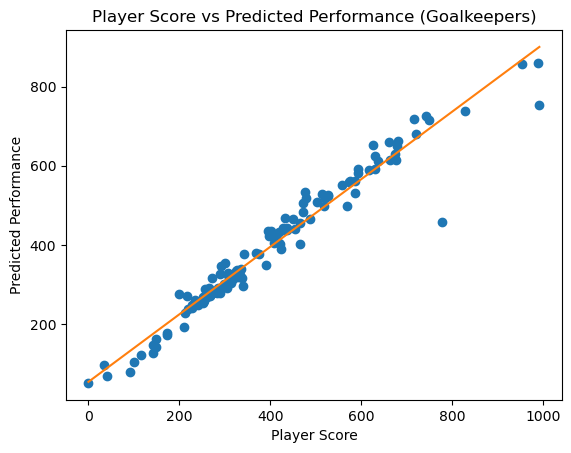

In [38]:
# Graph for examining the relationship between goalkeepers' Player Score and Predicted Performance

# Creates the scatterplot graph
x_GK_line = GK_datatset_1['Score']
y_GK_line = GK_datatset_1['Predicted_Performance']

plt.plot(x_GK_line, y_GK_line, 'o')
plt.title('Player Score vs Predicted Performance (Goalkeepers)')
plt.xlabel('Player Score')
plt.ylabel('Predicted Performance')

# Obtain m(slope) and b(intercept) to create the linear regression line
m, b = np.polyfit(x_GK_line, y_GK_line, 1)

# This adds the linear regression line to the scatterplot graph
plt.plot(x_GK_line, m * x_GK_line + b)


# Creating dataframe
pred_val_GK_2 = pd.DataFrame(GK_datatset_1)

# Define X and response y variables using the Predicted Performance and Player Score for goalkeepers
X_GK = pred_val_GK_2[['Score']]  
y_GK = pred_val_GK_2['Predicted_Performance']

# Evaluating the model
model_Lin_Pred.fit(X_GK, y_GK)
rsq_GK = model_Lin_Pred.score(X_GK, y_GK)
print(f'R-squared: {rsq_GK}')

# Adapted From:
# Title: How to Create a Scatterplot with a Regression Line in Python
# Author: Bobbitt, Zach
# Date: 2020
# Code Version: N/A
# Source: "https://www.statology.org/scatterplot-with-regression-line-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (With Example)
# Author: Bobbitt, Zach
# Date: 2022
# Code Version: N/A
# Source: "https://www.statology.org/r-squared-in-python/"

# Adapted From:
# Title: How to Calculate R-Squared in Python (SkLearn and SciPy)
# Author: Piepenbreier, Nik
# Date: 2023
# Code Version: N/A
# Source: "https://datagy.io/python-r-squared/"

In [39]:
# Save all the new datasets as CSVs 
main_dataset.to_csv('file_mid_reg.csv', encoding='utf-8-sig', index=False)
new_att_dataset_1.to_csv('file_att_reg.csv', encoding='utf-8-sig', index=False)
new_def_datatset_1.to_csv('file_def_reg.csv', encoding='utf-8-sig', index=False)
GK_datatset_1.to_csv('file_GK_reg.csv', encoding='utf-8-sig', index=False)

In [40]:
output_dataset_2 = main_dataset[['Player', 'Score', 'Country_of_Birth']]
new_att_dataset_2 = new_att_dataset_1[['Player', 'Score', 'Country_of_Birth']]
new_def_datatset_2 = new_def_datatset_1[['Player', 'Score', 'Country_of_Birth']]
GK_datatset_3 = GK_datatset_1[['Player', 'Score', 'Country_of_Birth']]

# Merge the datasets in steps and remove duplicates at each step
# This dataset will be used for Tableau applications
new_df = pd.merge(output_dataset_2, new_att_dataset_2, on=['Player', 'Score', 'Country_of_Birth'], how='outer')
new_df_2 = pd.merge(new_df, new_def_datatset_2, on=['Player', 'Score', 'Country_of_Birth'], how='outer')
new_df_3 = pd.merge(new_df_2, GK_datatset_3, on=['Player', 'Score', 'Country_of_Birth'], how='outer')

# Adapted From:
# Title: Join in Pandas: Merge data frames (inner, outer, right, left join) in pandas python
# Author: Sridhar Venkatachalam
# Date: No date
# Code Version: N/A
# Source: "https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/""

# Adapted From:
# Title: Python | Pandas dataframe.drop_duplicates()
# Author: Geeks for Geeks
# Date: 2024
# Code Version: N/A
# Source: "https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/"

In [41]:
new_df_3.to_csv('map_players.csv', encoding='utf-8-sig', index=False)

In [42]:
'''Reference List

Bharathiraja (2018) Random Forest Regression Using Python Sklearn From Scratch. Medium [online]. 
Available at: https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb  [Accessed on: 31st July 2024]

Bobbitt, Z. (2021) What is Considered a Good RMSE Value? Statology [online]. 
Available at: https://www.statology.org/what-is-a-good-rmse/ [Accessed on: 30th July 2024]

Bobbitt, Z. (2021) MSE vs. RMSE: Which Metric Should You Use? Statology [online]. 
Available at: https://www.statology.org/mse-vs-rmse/ [Accessed on: 30th July 2024]

Geeks for Geeks (2020) Python | Pandas dataframe.drop_duplicates(). Geeks for Geeks [online].
Available at: "https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/"

MaFisher (2023) Drafting The Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios. Medium [online]. 
Available at: https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-data-science-in-mlb-draft-scenarios-6444d9d7b89f [Accessed on: 1st June 2024]

Matplotlib (No date) Title: Matplotlib 3.9.2 documentation. Matplotlib [online]. Code Version: 3.9.2.
Available at: "https://matplotlib.org/stable/index.html" [Accessed on: 5th August 2024]

Pandas (No date) Title: User Guide - Pandas. Pandas [online]. 
Available at: "https://pandas.pydata.org/docs/user_guide/index.html" [Accessed on: 5th August 2024]

Piepenbreier, N (2023) How to Calculate R-Squared in Python (SkLearn and SciPy). Datagy.
Available at: "https://datagy.io/python-r-squared/"

numpy (No date) Title: NumPy user guide. numpy [online]. Code Version: 2.0.
Available at: "https://numpy.org/doc/stable/user/index.html#user" [Accessed on: 5th August 2024]

scikit-learn (No date) sklearn.model_selection. scikit-learn [online]. Code Version: 1.5.1.   
Available at: "https://scikit-learn.org/stable/api/sklearn.model_selection.html" [Accessed on: 5th August 2024]

scikit-learn (No date) sklearn.ensemble. scikit-learn [online]. Code Version: 1.5.1.   
Available at: "https://scikit-learn.org/stable//api/sklearn.ensemble.html" [Accessed on: 5th August 2024]

scikit-learn (No date) sklearn.linear_model. scikit-learn [online]. Code Version: 1.5.1.   
Available at: "https://scikit-learn.org/stable/api/sklearn.linear_model.html" [Accessed on: 5th August 2024]

scikit-learn (No date) sklearn.metrics. scikit-learn [online]. Code Version: 1.5.1.   
Available at: "https://scikit-learn.org/stable/api/sklearn.metrics.html" [Accessed on: 5th August 2024]

Shaw and Holland (2019) Hierarchical Big data landscape Model. Research In Progress. 
In: Lecture notes and personal correspondence. Algorithms I. CP Holland, Loughborough University, (2024).

Venkatachalam, S. (2020) Join in Pandas: Merge data frames (inner, outer, right, left join) in pandas python. 
Data science made simple [online] Available at: "https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/"
'''

'Reference List\n\nBharathiraja (2018) Random Forest Regression Using Python Sklearn From Scratch. Medium [online]. \nAvailable at: https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb  [Accessed on: 31st July 2024]\n\nBobbitt, Z. (2021) What is Considered a Good RMSE Value? Statology [online]. \nAvailable at: https://www.statology.org/what-is-a-good-rmse/ [Accessed on: 30th July 2024]\n\nBobbitt, Z. (2021) MSE vs. RMSE: Which Metric Should You Use? Statology [online]. \nAvailable at: https://www.statology.org/mse-vs-rmse/ [Accessed on: 30th July 2024]\n\nGeeks for Geeks (2020) Python | Pandas dataframe.drop_duplicates(). Geeks for Geeks [online].\nAvailable at: "https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/"\n\nMaFisher (2023) Drafting The Perfect Prospect: Leveraging Data Science in MLB Draft Scenarios. Medium [online]. \nAvailable at: https://mafisher.medium.com/drafting-the-perfect-prospect-leveraging-